# Studi Kasus EDA

Dataset yang digunakan adalah The Ramen Rate tahun 2012-2016 dari https://www.kaggle.com/residentmario/ramen-ratings.

Keterangan variabel-variabel dari dataset tersebut adalah sebagai berikut :

1. Review : banyaknya ulasan
2. Brand : Merek ramen
3. Variety : Variasi ramen
4. Style : Tempat penyajian ramen
5. Country : Negara yang menyediakan ramen
6. Stars(ratings) : Kualitas ramen, sebagaimana dinilai oleh pengulas
7. Top Ten : Prestasi ramen

In [39]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats.stats import pearsonr

In [40]:
data = pd.read_csv('ramen-ratings.csv')
B, K = data.shape
print('Baris = ', B, ', Kolom = ', K)
data.head(10)

Baris =  2580 , Kolom =  7


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


In [41]:
# Cek type data dan missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2580 non-null int64
Brand       2580 non-null object
Variety     2580 non-null object
Style       2578 non-null object
Country     2580 non-null object
Stars       2580 non-null object
Top Ten     41 non-null object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [42]:
# Mengubah type data Stars dari object menjadi numerik(float64)
data['Stars'] = pd.to_numeric(data['Stars'], errors='coerce')

In [43]:
# Mengganti nilai \n pada variabel diatas dengan nilai NaN
data[['Top Ten']] = data[['Top Ten']].replace('\n',np.nan)

In [44]:
# Menghapus data missing variabel Top Ten karena lebih dari 50% data yang missing
data.drop("Top Ten", axis=1, inplace=True)

In [45]:
# Menghapus baris yang terdapat data missing
d = data.dropna()

In [46]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2579
Data columns (total 6 columns):
Review #    2575 non-null int64
Brand       2575 non-null object
Variety     2575 non-null object
Style       2575 non-null object
Country     2575 non-null object
Stars       2575 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 140.8+ KB


In [47]:
# cek duplikat data
d.duplicated().sum()

0

In [48]:
print(d.shape)
d.head()

(2575, 6)


,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75


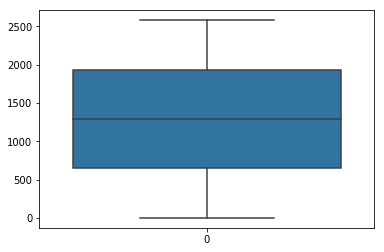

In [49]:
sns.boxplot(data = d['Review #'])

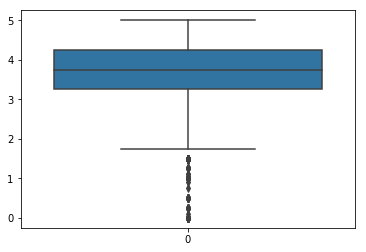

In [50]:
sns.boxplot(data = d['Stars'])

In [51]:
# Trimming : IQR
Q1 = d.quantile(0.25)
Q3 = d.quantile(0.75)
IQR = Q3 - Q1
print(IQR) # Menghitung jumlah data setelah di trim dengan IQR

Review #    1288.0
Stars          1.0
dtype: float64


In [52]:
dataramen = d[~((d<(Q1-1.5*IQR))|(d>(Q3+1.5*IQR))).any(axis=1)]
dataramen.shape # data setelah di cek outlier

(2446, 6)

In [53]:
d.shape # data sebelum cek outlier

(2575, 6)

Jadi, data yang merupakan outlier dengan kata lain jauh dari data-data yang lain telah dibuang sejumlah 129 dengan IQR dari dataset

In [54]:
dataramen.head()

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75


### Basic Statistics dan Visualisasi

In [55]:
# Statistik sederhana dari semua variabel data
dataramen.describe(include='all')

,Review #,Brand,Variety,Style,Country,Stars
count,2446.000000,2446,2446,2446,2446,2446.000000
unique,NaN,331,2287,7,37,NaN
top,NaN,Nissin,Beef,Pack,Japan,NaN
freq,NaN,379,7,1460,342,NaN
mean,1296.303761,NaN,NaN,NaN,NaN,3.803618
std,739.792474,NaN,NaN,NaN,NaN,0.791631
min,2.000000,NaN,NaN,NaN,NaN,1.750000
25%,664.250000,NaN,NaN,NaN,NaN,3.250000
50%,1293.500000,NaN,NaN,NaN,NaN,3.750000
75%,1939.750000,NaN,NaN,NaN,NaN,4.250000


Diperoleh dari data sejumlah 2446 terdapat 331 Brand ramen, 2287 Variasi ramen, 7 Style dan 37 Negara, rata-rata jumlah review Ramen yang diberikan masyarakat adalah 1296.3 dan rata-rata masyarakat memberikan rating senilai 3.8, jumlah review ramen tertentu paling sedikit adalah 2 dan paling banyak 2580, stars (rating/penilaian) memiliki minimal senilai 1.75 dan maksimal senilai 5.

#### Jumlah Penyajian Ramen dengan 7 Style

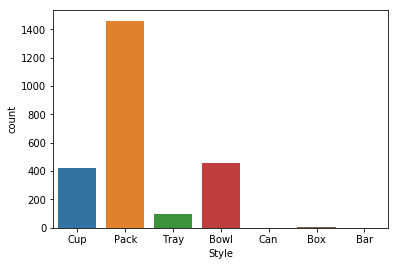

In [56]:
s = sns.countplot(x = "Style", data = dataramen)

Diperoleh dari diagram diatas bahwa Style Pack lebih banyak digunakan dalam penyajian ramen dan Style Box dan bar lebih sedikit digunakan dalam penyajian ramen.

#### 10 Top Brand Ramen
#### Apakah Brand Ramen Indomie termasuk kategori 10 Top Brand Ramen ?

Text(0.5, 1.0, '10 Top Brand Ramen')

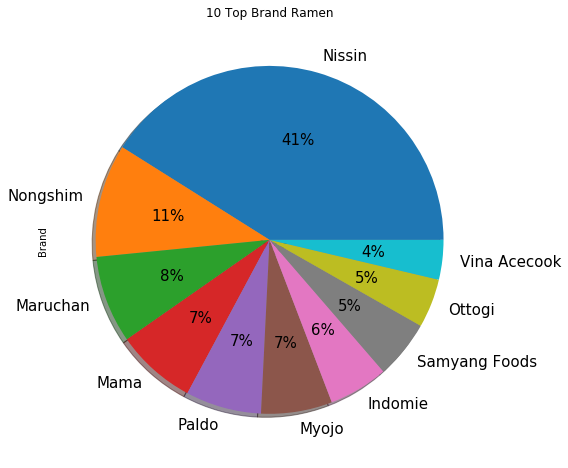

In [57]:
Brand_ten = dataramen.groupby(dataramen['Brand'])['Brand'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(12,8))
plt.subplot()
Brand_ten.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 15)
plt.title("10 Top Brand Ramen")

Dilihat dari diagram 10 Top Brand Ramen, diperoleh brand Nissin unggul senilai 41%, brand Nongshim senilai 11%, brand Maruchan senilai 8%, brand Mama, Paldo, dan Myojo senilai 7%, brand Indomie senilai 6%, brand Samyang Foods dan Ottogi senilai 5%, brand Vina Acecook senilai 4%. Indomie termasuk dalam kategori 10 Top Brand Ramen.

#### 10 Negara Peminat Ramen Terbanyak
#### Apakah Indonesia termasuk kategori negara peminat ramen terbanyak ?

Text(0.5, 1.0, '10 Negara Peminat Ramen Terbanyak')

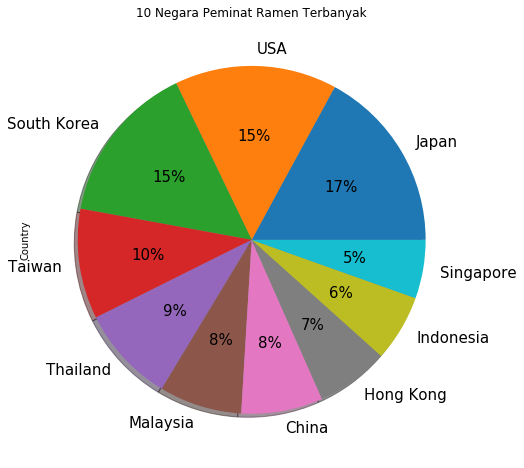

In [58]:
Country_ten = dataramen.groupby(dataramen['Country'])['Country'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(12,8))
plt.subplot()
Country_ten.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 15)
plt.title("10 Negara Peminat Ramen Terbanyak")

Dilihat dari diagram 10 negara peminat ramen terbanyak, diperoleh negara jepang unggul senilai 17%, USA dan South Korea senilai 15%, Taiwan senilai 10%, Thailand senilai 9%, Malaysia dan China senilai 8%, Hongkong senilai 7%, Indonesia senilai 6%, Singapore senilai 5%. Indonesia termasuk dalam kategori negara peminat ramen terbanyak.

#### Negara-negara peminat ramen dengan banyaknya style penyajian

In [59]:
CS = pd.crosstab(index = dataramen["Country"], columns = dataramen["Style"])
CS

Style,Bar,Bowl,Box,Can,Cup,Pack,Tray
Country,,,,,,,
Australia,0,0,0,0,16,5,0
Bangladesh,0,0,0,0,0,7,0
Brazil,0,0,0,0,2,3,0
Cambodia,0,0,0,0,0,5,0
Canada,0,6,0,0,11,13,0
China,0,41,0,0,13,91,7
Colombia,0,0,0,0,3,3,0
Dubai,0,0,0,0,0,3,0
Estonia,0,0,0,0,0,2,0


Diperoleh Style Bar hanya disajikan di negara USA, Style Bowl banyak disajikan di negara Jepang, Style Box hanya disajikan di negara Indonesia, Jepang, dan Malaysia, Style Can hanya disajikan di negara USA, Style Cup banyak disajikan di negara USA, Style Cup banyak disajikan di negara South Korea, dan Style Tray banyak disajikan di negara USA. Dapat disimpulkan bahwa dari berbagai negara rata-rata menggunakan Style Pack dan Cup.

#### Variasi Ramen dari Brand Nissin yang memiliki rating dibawah 3 di Negara Jepang

In [60]:
dataramen.loc[(dataramen.Brand == "Nissin") & (dataramen.Country == "Japan") & (dataramen.Stars < 3)]

,Review #,Brand,Variety,Style,Country,Stars
720,1860,Nissin,Cupo Noodle Pasta Style Vongole,Cup,Japan,2.75
954,1626,Nissin,Gonbuto Kistune Udon,Bowl,Japan,2.75
2497,83,Nissin,Demae Ramen Spicy Flavor,Pack,Japan,2.00
2498,82,Nissin,Demae Ramen Miso,Pack,Japan,2.75
2502,78,Nissin,Demae Ramen Seafood,Pack,Japan,2.50
2509,71,Nissin,Demae Ramen Satay,Pack,Japan,2.50
2556,24,Nissin,Demae Ramen Spicy Seafood With Chili Pepper,Pack,Japan,2.00


Dilihat dari segi variasi ramen dari brand Nissin dengan rating rendah yaitu dibawah 3 di negara Jepang, sebagai berikut:
1. Variasi Cupo Noodle Pasta Style Vongole dengan Style Cup memiliki rating/penilaian (stars) sebanyak 2.75
2. Variasi Gonbuto Kistune Udo dengan Style Bowl memiliki rating/penilaian (stars) sebanyak 2.75
3. Variasi Demae Ramen Spicy Flavor dengan Style Pack memiliki rating/penilaian (stars) sebanyak 2.00
4. Variasi Demae Ramen Miso dengan Style Pack memiliki rating/penilaian (stars) sebanyak 2.75
5. Variasi Demae Ramen Seafood dengan Style Pack memiliki rating/penilaian (stars) sebanyak 2.50
6. Variasi Demae Ramen Satay dengan Style Pack memiliki rating/penilaian (stars) sebanyak 2.50
7. Variasi Demae Ramen Spicy Seafood With Chili Pepper dengan Style Pack memiliki rating/penilaian (stars) sebanyak 2.00

#### 5 Variasi Ramen dengan rating 5 teratas (review terbanyak) di Negara Indonesia

In [61]:
dataramen.loc[(dataramen.Country == "Indonesia") & (dataramen.Stars == 5)].head(5)

,Review #,Brand,Variety,Style,Country,Stars
142,2438,World O' Noodle,Mi Goreng Original Flavour Fried Noodles,Pack,Indonesia,5.0
724,1856,Indomie,Instant Cup Noodles Mi Goreng Fried Noodles,Cup,Indonesia,5.0
830,1750,Mi Sedaap,Instant Cup Mi Kuah Rasa Soto,Cup,Indonesia,5.0
977,1603,Salam Mie,Mi Goreng Ala Jawa Dengan Sambal Cabe Asli,Pack,Indonesia,5.0
1320,1260,ABC,Mi Goreng Pangsit Fried Noodle With Dumpling,Pack,Indonesia,5.0


Dilihat 5 data teratas dari segi variasi ramen dengan rating tinggi yaitu 5 di negara Indonesia, sebagai berikut:
1. Variasi Mi Goreng Original Flavour Fried Noodles dari Brand World O' Noodle dengan Style Cup
2. Variasi Instant Cup Noodles Mi Goreng Fried Noodles dari Brand Indomie dengan Style Cup
3. Variasi Instant Cup Mi Kuah Rasa Soto dari Brand Mi Sedaap dengan Style Cup
4. Variasi Mi Goreng Ala Jawa Dengan Sambal Cabe Asli dari Brand Salam mie dengan Style Pack
5. Variasi Mi Goreng Pangsit Fried Noodle With Dumpling dari Brand ABC dengan Style Pack

#### Variasi Ramen dengan rating dibawah 3 di Negara Indonesia

In [62]:
dataramen.loc[(dataramen.Country == "Indonesia") & (dataramen.Stars < 3)]

,Review #,Brand,Variety,Style,Country,Stars
1240,1340,Indomie,Taste Of Asia Mi Goreng Rasa Bulgogi Ala Korea,Pack,Indonesia,2.75
1806,774,Indomie,Rasa Sup Sayuran Vegan,Pack,Indonesia,2.25
1895,685,Indomie,Rasa Sup Buntut Oxtail Soup,Pack,Indonesia,2.75
2504,76,Indomie,Meatball Flavor,Pack,Indonesia,2.50
2527,53,Indomie,Chicken,Cup,Indonesia,2.00


Dilihat dari segi variasi ramen dengan rating rendah yaitu dibawah 3 di negara Indonesia, sebagai berikut:
1. Variasi Taste Of Asia Mi Goreng Rasa Bulgogi Ala Korea dari Brand Indomie dengan Style Cup
2. Variasi Rasa Sup Sayuran Vegan dari Brand Indomie dengan Style Cup
3. Variasi Rasa Sup Buntut Oxtail Soup dari Brand Indomie dengan Style Cup
4. Variasi Meatball Flavor dari Brand Indomie dengan Style Pack
5. Variasi Chicken dari Brand Indomie dengan Style Pack

#### Variasi Ramen di Dunia dengan rating rendah yaitu dibawah 2

In [63]:
dataramen.loc[dataramen.Stars < 2].tail(5)

,Review #,Brand,Variety,Style,Country,Stars
2427,153,Sapporo Ichiban,Shrimp Flavor,Cup,USA,1.75
2441,139,Kamfen,Noodle King Beef,Pack,China,1.75
2443,137,Nissin,Bowl Noodles Rich & Savory Chicken,Bowl,USA,1.75
2496,84,Samyang,Kalgug-Su Assorted Clam,Pack,South Korea,1.80
2511,69,Baijia,Spicy Fei- Chang Sweet Potato Noodle,Pack,China,1.75


Dilihat 5 data terbawah dari segi variasi ramen di berbagai negara dengan rating rendah yaitu dibawah 2 dan review terendah, sebagai berikut:
1. Variasi ramen Shrimp Flavor dari Brand Sapporo Ichiban dengan penyajian Cup memiliki peminat yang rendah di USA dengan stars 1.75
2. Variasi ramen Noodle King Beef dari Brand Kamfen dengan penyajian Pack memiliki peminat yang rendah di China dengan stars 1.75
3. Variasi ramen Bowl Noodles Rich & Savory Chicken dari Brand Nissin dengan penyajian Bowl memiliki peminat yang rendah di USA dengan stars 1.75
4. Variasi ramen Kalgug-Su Assorted Clam dari Brand Samyang dengan penyajian Pack memiliki peminat yang rendah di South Korea dengan stars 1.8
5. Variasi ramen Spicy Fei- Chang Sweet Potato Noodle dari Brand Baijia dengan penyajian Pack memiliki peminat yang rendah di China dengan stars 1.75

#### Apakah jumlah Review berpengaruh signifikan terhadap Ratings/Stars ?

In [64]:
# Koefisien Korelasi
x = dataramen['Review #']
y = dataramen['Stars']
pearsonr(x,y)

(0.3083718296536227, 4.8642100888645324e-55)

Dilihat dari hasil koefisien korelasi dengan nilai 0.31 dapat dikatakan nilainya rendah, artinya rating atau variabel stars tidak dipengaruhi oleh jumlah review (ulasan) atau variabel review.

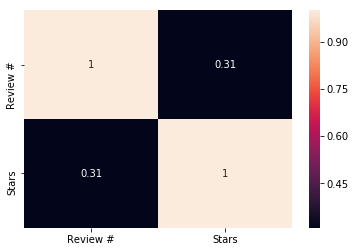

In [65]:
sns.heatmap(dataramen.corr(),annot=True)